Let's make an oscillator that slows down as it goes through the cycle

In [99]:
import nengo
import numpy as np

model = nengo.Network()
model.config[nengo.Ensemble].neuron_type=nengo.LIFRate()
with model:
    
    T = 10.0
        
    def stim_func(t):
        if 0 < t % T < 0.05:
            return 10
        return 0
    stim = nengo.Node(stim_func)
    a = nengo.Ensemble(n_neurons=500, dimensions=2, intercepts=nengo.dists.Uniform(0.3,0.3))
    nengo.Connection(stim, a[0])
    
    def temporal(x):
        theta = np.arctan2(x[1], x[0])
        r = np.sqrt(x[0]**2+x[1]**2)
        
        if theta < 0:
            theta += np.pi*2

        scale = 0.5
        e_theta = np.exp(scale*theta)
        e_theta += 0.15
        theta = np.log(e_theta)/scale

        return r*np.cos(theta), r*np.sin(theta)
    nengo.Connection(a, a, function=temporal, synapse=0.1)

    p_spikes = nengo.Probe(a.neurons)
    p_value = nengo.Probe(a, synapse=0.03)

In [100]:
sim = nengo.Simulator(model)
with sim:
    sim.run(10)

Simulation finished in 0:00:03.                                                 


In [101]:
%matplotlib inline
import pylab

Here's what the represented value looks like over time

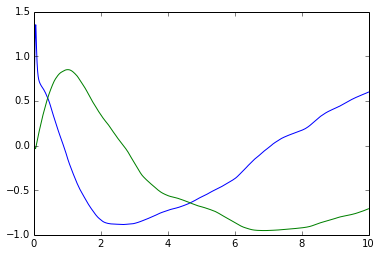

In [102]:
pylab.plot(sim.trange(), sim.data[p_value]);

And here are the temporal tuning curves

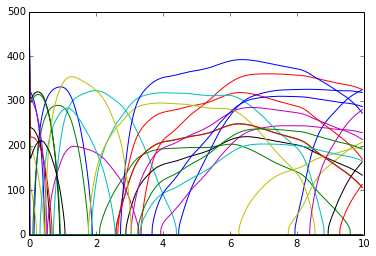

In [103]:
pylab.plot(sim.trange()-0.05, sim.data[p_spikes][:,:30])
pylab.xlim(0, T)
pylab.show()

If we sort these neurons by where their peak is, we find that about half the neurons have peaks, and we get a nice gradual spread of the representation.

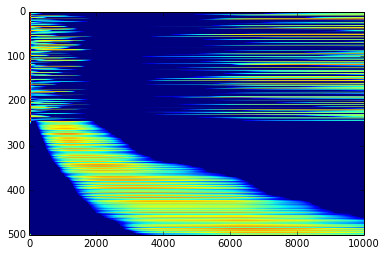

In [104]:
peaks = np.argmax(sim.data[p_spikes], axis=0)
order = np.argsort(peaks)
s = sim.data[p_spikes]
s = s[:,order]
pylab.imshow(s.T, aspect='auto')
pylab.show()